# Диагностика моделей и предобработка данных

Подготовлено на основе [материалов с сайта Коротеева М.В.](https://koroteev.site/ml/)

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score,recall_score,accuracy_score,fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin
import warnings
import time
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## Диагностика моделей

1.1 Загрузите датасет `breast_cancer`. Выберите два первых признака. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [8]:
y = data['target']
X = data['data']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

1.2 Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [12]:
models = ['SVC(kernel = "rbf", max_iter = 1000, C = 0.01)']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[model])
    
    y_pred = pipeline.predict(X_train)
    
    metrics[model] = {'accuracy':accuracy_score(y_train, y_pred),
                         'precision':precision_score(y_train, y_pred, average='weighted'),
                         'recall':recall_score(y_train, y_pred,average='weighted'),
                         'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])

SVC(kernel = "rbf", max_iter = 1000, C = 0.01)
{'accuracy': 0.7192982456140351, 'precision': 0.8056680161943319, 'recall': 0.7192982456140351, 'f1': 0.6584468163415532, 'f0.5': 0.6905658789115932, 'f2': 0.683510542005093, 'time': 0.009000778198242188}
{'accuracy': 0.8197802197802198, 'precision': 0.8600473096385902, 'recall': 0.8197802197802198, 'f1': 0.8024734812436339, 'f0.5': 0.824108333697806, 'f2': 0.8063476973148507, 'time': 0.009000778198242188}


In [ ]:
#предварительный вывод сделать сложно тк действительно все метрики для обучающей выборки больше, чем для тестовой 
#но в действительности такая ситуация наблюдается почтии всегда даже у очень хороших моделей(разница не существенна)

1.3 Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
* собрать больше объектов наблюдения;
* провести обучение на меньшем объеме данных;
* исключить часть признаков из модели;
* добавить новые признаки в модель;
* добавить полиномиальные признаки;
* попробовать более сложные модели;
* попробовать более простые модели;
* увеличить регуляризацию модели;
* уменьшить регуляризацию модели;

Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [28]:
models = ['SVC(kernel = "rbf", max_iter = 1000, C = 0.01)']
metrics_test = {}
metrics_train = {}
split_values = np.arange(0.1,0.5,0.05)
for model in models:
    for split in split_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
        print(model)
        pipeline = Pipeline([
                             ('model', eval(model))])

        start = time.time()
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        stop = time.time()

        metrics_test[split] = {'accuracy':accuracy_score(y_test, y_pred),
                             'precision':precision_score(y_test, y_pred, average='weighted'),
                             'recall':recall_score(y_test, y_pred,average='weighted'),
                             'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                             'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                             'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                             'time' : (stop-start)}
        print(metrics_test[split])

        y_pred = pipeline.predict(X_train)

        metrics_train[split] = {'accuracy':accuracy_score(y_train, y_pred),
                             'precision':precision_score(y_train, y_pred, average='weighted'),
                             'recall':recall_score(y_train, y_pred,average='weighted'),
                             'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                             'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                             'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                             'time' : (stop-start)}

        print(metrics_train[split])

SVC(kernel = "rbf", max_iter = 1000, C = 0.01)
{'accuracy': 0.7719298245614035, 'precision': 0.8350130645763345, 'recall': 0.7719298245614035, 'f1': 0.7453088388760905, 'f0.5': 0.7770176191228823, 'f2': 0.7519159518854996, 'time': 0.010001182556152344}
{'accuracy': 0.822265625, 'precision': 0.8613328426932367, 'recall': 0.822265625, 'f1': 0.8050609704388259, 'f0.5': 0.8261480223255325, 'f2': 0.8090106091026369, 'time': 0.010001182556152344}
SVC(kernel = "rbf", max_iter = 1000, C = 0.01)
{'accuracy': 0.7441860465116279, 'precision': 0.8202388434946575, 'recall': 0.7441860465116279, 'f1': 0.7053461087839248, 'f0.5': 0.741030505734087, 'f2': 0.717756351106178, 'time': 0.009002208709716797}
{'accuracy': 0.8157349896480331, 'precision': 0.8573583041691627, 'recall': 0.8157349896480331, 'f1': 0.7967549027448263, 'f0.5': 0.8190656703242518, 'f2': 0.8013880443975805, 'time': 0.009002208709716797}
SVC(kernel = "rbf", max_iter = 1000, C = 0.01)
{'accuracy': 0.7192982456140351, 'precision': 0.805

In [29]:
pd.DataFrame(metrics_test)

,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
accuracy,0.771930,0.744186,0.719298,0.741259,0.736842,0.745000,0.728070,0.661479
precision,0.835013,0.820239,0.805668,0.817846,0.814241,0.816851,0.808354,0.779757
recall,0.771930,0.744186,0.719298,0.741259,0.736842,0.745000,0.728070,0.661479
f1,0.745309,0.705346,0.658447,0.698160,0.686429,0.692847,0.665599,0.554340
f0.5,0.777018,0.741031,0.690566,0.733054,0.719298,0.722470,0.693941,0.557344
f2,0.751916,0.717756,0.683511,0.713093,0.705803,0.713914,0.692370,0.607321
time,0.010001,0.009002,0.008002,0.008002,0.008002,0.008002,0.007001,0.007001


In [30]:
pd.DataFrame(metrics_train)

,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
accuracy,0.822266,0.815735,0.819780,0.791080,0.786432,0.769648,0.724340,0.657051
precision,0.861333,0.857358,0.860047,0.843018,0.840783,0.832404,0.809858,0.778560
recall,0.822266,0.815735,0.819780,0.791080,0.786432,0.769648,0.724340,0.657051
f1,0.805061,0.796755,0.802473,0.764588,0.759388,0.738615,0.673433,0.549498
f0.5,0.826148,0.819066,0.824108,0.791386,0.787224,0.769791,0.709701,0.553764
f2,0.809011,0.801388,0.806348,0.772301,0.767158,0.747795,0.692265,0.602419
time,0.010001,0.009002,0.008002,0.008002,0.008002,0.008002,0.007001,0.007001


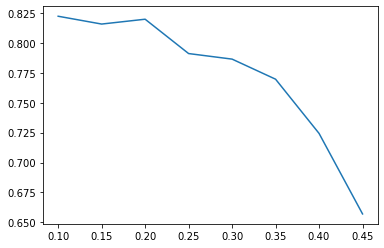

In [31]:
plt.plot(split_values, [metrics_train[i]['accuracy'] for i in metrics_test])

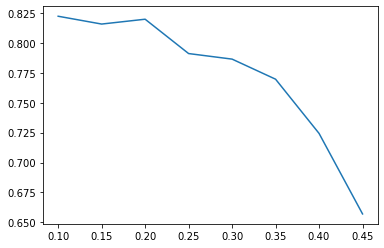

In [32]:
plt.plot(split_values, [metrics_train[i]['accuracy'] for i in metrics_train])

In [35]:
len(X)

569

In [36]:
#Наилучшие метрики можно увидеть при разбиение выборки 9 к 1, на мой взгляд это связано с тем,
#что выборка в целом не очень большая и 56 значений для теста могут быть не супер объективными
#хотя с другйо стороны при маленьком объеме выборки рационалоьно Train часть делать больше для более
#высокого качсетва модели

1.4 Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000 (без использования специальных методик подбора параметров). Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение? Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели

In [54]:
metrics_test = {}
metrics_train = {}
C_values = np.arange(0.0001,1000000,1000)
for C in C_values :
    print(C)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    model = SVC(kernel = "rbf", max_iter = 1000, C = C)
    pipeline = Pipeline([
                         ('model', model)])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics_test[C] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}

    y_pred = pipeline.predict(X_train)

    metrics_train[C] = {'accuracy':accuracy_score(y_train, y_pred),
                         'precision':precision_score(y_train, y_pred, average='weighted'),
                         'recall':recall_score(y_train, y_pred,average='weighted'),
                         'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}


0.0001
1000.0001
2000.0001
3000.0001
4000.0001
5000.0001
6000.0001
7000.0001
8000.0001
9000.0001
10000.0001
11000.0001
12000.0001
13000.0001
14000.0001
15000.0001


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


16000.0001
17000.0001
18000.0001
19000.0001
20000.0001
21000.0001
22000.0001
23000.0001
24000.0001
25000.0001
26000.0001
27000.0001
28000.0001
29000.0001
30000.0001
31000.0001
32000.0001
33000.0001
34000.0001
35000.0001
36000.0001
37000.0001
38000.0001
39000.0001
40000.0001
41000.0001
42000.0001
43000.0001
44000.0001
45000.0001
46000.0001
47000.0001
48000.0001
49000.0001
50000.0001
51000.0001
52000.0001
53000.0001
54000.0001
55000.0001
56000.0001
57000.0001
58000.0001
59000.0001
60000.0001
61000.0001
62000.0001
63000.0001
64000.0001
65000.0001
66000.0001
67000.0001
68000.0001
69000.0001
70000.0001
71000.0001
72000.0001
73000.0001
74000.0001
75000.0001
76000.0001
77000.0001
78000.0001
79000.0001
80000.0001
81000.0001
82000.0001
83000.0001
84000.0001
85000.0001
86000.0001
87000.0001
88000.0001
89000.0001
90000.0001
91000.0001
92000.0001
93000.0001
94000.0001
95000.0001
96000.0001
97000.0001
98000.0001
99000.0001
100000.0001
101000.0001
102000.0001
103000.0001
104000.0001
105000.0001
1060

707000.0001
708000.0001
709000.0001
710000.0001
711000.0001
712000.0001
713000.0001
714000.0001
715000.0001
716000.0001
717000.0001
718000.0001
719000.0001
720000.0001
721000.0001
722000.0001
723000.0001
724000.0001
725000.0001
726000.0001
727000.0001
728000.0001
729000.0001
730000.0001
731000.0001
732000.0001
733000.0001
734000.0001
735000.0001
736000.0001
737000.0001
738000.0001
739000.0001
740000.0001
741000.0001
742000.0001
743000.0001
744000.0001
745000.0001
746000.0001
747000.0001
748000.0001
749000.0001
750000.0001
751000.0001
752000.0001
753000.0001
754000.0001
755000.0001
756000.0001
757000.0001
758000.0001
759000.0001
760000.0001
761000.0001
762000.0001
763000.0001
764000.0001
765000.0001
766000.0001
767000.0001
768000.0001
769000.0001
770000.0001
771000.0001
772000.0001
773000.0001
774000.0001
775000.0001
776000.0001
777000.0001
778000.0001
779000.0001
780000.0001
781000.0001
782000.0001
783000.0001
784000.0001
785000.0001
786000.0001
787000.0001
788000.0001
789000.0001
7900

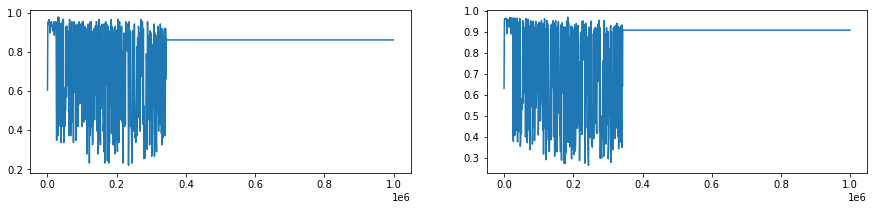

In [56]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(C_values, [metrics_test[i]['accuracy'] for i in metrics_test])
ax2.plot(C_values, [metrics_train[i]['accuracy'] for i in metrics_train])
plt.show()

1.5 Найдите методом подбора оптимальное значение параметра регуляризации.

In [69]:
C = list(metrics_test.keys())[np.argmax([metrics_test[i]['accuracy'] for i in metrics_test])]

In [71]:
metrics_test = {}
metrics_train = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
model = SVC(kernel = "rbf", max_iter = 1000, C = C)
pipeline = Pipeline([
                     ('model', model)])

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
stop = time.time()

metrics_test[C] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                     'time' : (stop-start)}
print(metrics_test)
y_pred = pipeline.predict(X_train)

metrics_train[C] = {'accuracy':accuracy_score(y_train, y_pred),
                     'precision':precision_score(y_train, y_pred, average='weighted'),
                     'recall':recall_score(y_train, y_pred,average='weighted'),
                     'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                     'time' : (stop-start)}
print(metrics_train)

{30000.0001: {'accuracy': 0.9767441860465116, 'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1': 0.9767441860465116, 'f0.5': 0.9767441860465116, 'f2': 0.9767441860465116, 'time': 0.006001710891723633}}
{30000.0001: {'accuracy': 0.9668737060041408, 'precision': 0.9668561465915216, 'recall': 0.9668737060041408, 'f1': 0.9667933916623904, 'f0.5': 0.9668137417436887, 'f2': 0.9668245433046098, 'time': 0.006001710891723633}}


In [ ]:
#метрики прекрасные

## Предварительная обработка данных

2.1 Загрузите и прочитайте в pandas [датасет](https://raw.githubusercontent.com/ParthRajauria/DataScienceProject-1/master/cars_sampled.csv). При загрузке укажите корректные типы данных для всех столбцов, где это необходимо. Все числовые значения переведите в формат int.

In [138]:
data = pd.read_csv('https://raw.githubusercontent.com/ParthRajauria/DataScienceProject-1/master/cars_sampled.csv'\
,parse_dates = ['dateCrawled','dateCreated','lastSeen'])

2.2 Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [139]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


In [140]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

In [142]:
data.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

2.3 Для каждого числового столбца (кроме price) постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

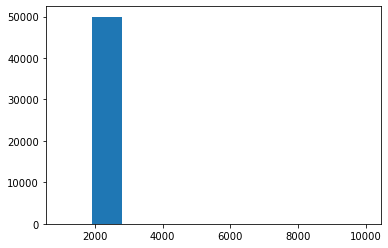

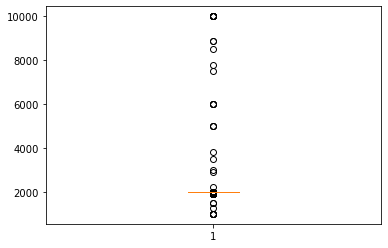

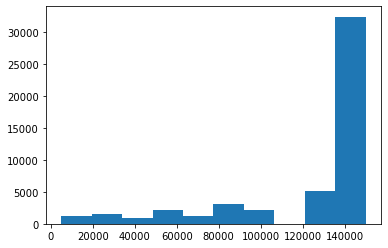

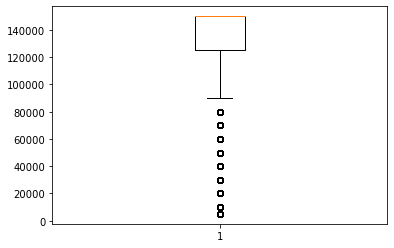

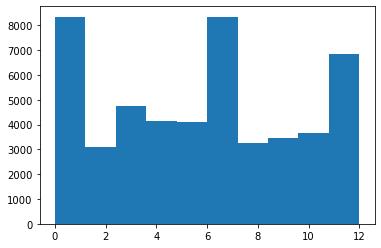

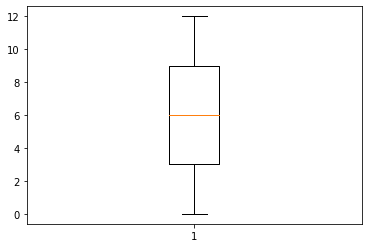

In [143]:
for column in ['yearOfRegistration','kilometer','monthOfRegistration']:
    plt.hist(data[column])
    plt.show()
    plt.boxplot(data[column])
    plt.show()

In [144]:
for i in ['yearOfRegistration','kilometer','monthOfRegistration']:
    data[i] =  data[i].fillna(data[i].median())

2.4 Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

In [145]:
for i in ['gearbox','fuelType','vehicleType','notRepairedDamage']:
    print(data.set_index(i).groupby(i).boxplot(by = "price"))

C:\Users\Vladc\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x0000020BD0DF8D30>
Traceback (most recent call last):
  File "C:\Users\Vladc\anaconda3\lib\weakref.py", line 57, in _cb
    self = self_wr()
KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020BAF7BB9D0> (for post_execute):


KeyboardInterrupt: 

2.5 Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [146]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


In [147]:
data.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [159]:
for i in ['vehicleType','gearbox','model','fuelType','notRepairedDamage']:
    data[i] =  data[i].fillna(Counter(data['vehicleType']).most_common(1)[0][0])

In [160]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,limousine,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,limousine,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


2.6 Закодируйте нечисловые характеристики при помощи одного из известных вам методов кодирования

In [162]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['seller','offerType','abtest','brand','postalCode','name',\
           'dateCrawled','dateCreated','lastSeen',\
          'vehicleType','gearbox','model','fuelType','notRepairedDamage']
for i in columns:
    data[i] = encoder.fit_transform(data[i])

In [163]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,7798,37987,1,0,4450,1,3,2003,2,150,11,150000,3,1,2,0,55,1038,8923
1,9696,37232,1,0,13299,0,7,2005,2,163,243,150000,6,1,39,1,66,5907,5588
2,14,36528,1,0,3200,1,0,2003,2,101,221,150000,11,1,38,0,56,1686,87
3,3603,27740,1,0,4500,0,5,2006,2,86,120,60000,12,7,30,1,44,2137,8923
4,2512,37241,1,0,18750,1,7,2008,0,185,243,150000,11,1,39,1,41,3410,389


2.7 Постройте модель регрессии для цены автомобиля. Обучите ее на данных, полученных из исходного датасета с применением 
методов заполнения пропущенных значений и кодирования нечисловых признаков.

In [164]:
y = data['price']
X = data.loc[:, data.columns != 'price']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [167]:
models = ['LogisticRegression()']
metrics = {}
for model in models:
    print(model)
    pipeline = Pipeline([('scaler',StandardScaler()),
                         ('model', eval(model))])

    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    stop = time.time()

    metrics[model] = {'accuracy':accuracy_score(y_test, y_pred),
                         'precision':precision_score(y_test, y_pred, average='weighted'),
                         'recall':recall_score(y_test, y_pred,average='weighted'),
                         'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
    print(metrics[model])
    
    y_pred = pipeline.predict(X_train)
    
    metrics[model] = {'accuracy':accuracy_score(y_train, y_pred),
                         'precision':precision_score(y_train, y_pred, average='weighted'),
                         'recall':recall_score(y_train, y_pred,average='weighted'),
                         'f1':fbeta_score(y_train, y_pred,beta = 1, average ='weighted'),
                         'f0.5':fbeta_score(y_train, y_pred,beta = 0.5, average ='weighted'),
                         'f2':fbeta_score(y_train, y_pred,beta = 2, average ='weighted'),
                         'time' : (stop-start)}
                                        
    print(metrics[model])

LogisticRegression()


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.028897110288971104, 'precision': 0.007492286793063929, 'recall': 0.028897110288971104, 'f1': 0.005862083042404292, 'f0.5': 0.005068645938664848, 'f2': 0.009926574576281717, 'time': 364.599196434021}
{'accuracy': 0.034575, 'precision': 0.014963866277036624, 'recall': 0.034575, 'f1': 0.011215943647469383, 'f0.5': 0.010826598499250896, 'f2': 0.01528147306771483, 'time': 364.599196434021}


C:\Users\Vladc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Решение задачи на основе данных с kaggle

3.1 На сайте [kaggle](https://www.kaggle.com/datasets) выбрать набор данных каждому студенту индивидуально. Датасет должен удовлетворять следующим условиям:
* иметь не очень большой размер (не более 100мб)
* содержать пропуски
* содержать нечисловые столбцы.

Привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов)

3.2 Провести описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
* исследование шкалы измерения каждого существенного признака;
* построение эмпирического распределения каждого существенного признака;
* анализ количества и распределения отсутствующих значений;
* построение совместного распределения каждого признака и целевой переменной;
* построение корреляционной матрицы.

Сделать вывод по каждому из пунктов

3.3 Провести подготовительную обработку данных, включающую следующие шаги: 
* удаление или заполнение отсутствующих значений; 
* приведение всех признаков к бинарной либо числовой шкале; 
* удаление несущественных либо избыточных признаков; 
* другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

3.4 Использовать несколько моделей (не менее 3) машинного обучения для решения поставленной задачи. Сформировать сводную таблицу результатов обучения, включающую время обучения модели и основные метрики (accuracy, precision, recall, f1 для классификации; r2, mse, mape для регрессии).